#HeartBeat Sounds

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
#IMAGE PROCESS
from PIL import Image
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import IPython.display as ipd
import scipy
import tensorflow as tf
import wave

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os, fnmatch
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
INPUT = "/content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds/"
MAX_SOUND_CLIP_DURATION=12   
SAMPLE_RATE = 44100

## Data Exploratory Analysis

In [ ]:
set_a = pd.read_csv(INPUT + "set_a.csv" , delimiter=',')
set_b = pd.read_csv(INPUT + "set_b.csv" ,  delimiter=',')

In [ ]:
set_a.head(10)

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN
5       a  set_a/artifact__201105061143.wav  artifact       NaN
6       a  set_a/artifact__201105190800.wav  artifact       NaN
7       a  set_a/artifact__201105280851.wav  artifact       NaN
8       a  set_a/artifact__201106010559.wav  artifact       NaN
9       a  set_a/artifact__201106010602.wav  artifact       NaN

In [ ]:
set_a["dataset"].value_counts()

a    176
Name: dataset, dtype: int64

In [ ]:
(set_a.isnull() | set_a.empty).sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [ ]:
set_a["label"].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [ ]:
set_b.head(10)

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
5       b  set_b/Btraining_extrastole_140_1306519735121_D...  extrastole   
6       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
7       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
8       b  set_b/Btraining_extrastole_148_1306768801551_B...  extrastole   
9       b  set_b/Btraining_extrastole_151_1306779785624_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN

In [ ]:
set_b["dataset"].value_counts()

b    656
Name: dataset, dtype: int64

In [ ]:
(set_b.isnull() | set_b.empty).sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

In [ ]:
set_b["label"].value_counts()


normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

### Combine Datasets a & b

In [ ]:
training_data = pd.concat([set_a, set_b])

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data["dataset"].value_counts()

b    656
a    176
Name: dataset, dtype: int64

In [ ]:
training_data.shape

(832, 4)

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

### Split Test Data and Training Data

In [ ]:
test_data = training_data[training_data['label'].isnull()]

In [ ]:
test_data = test_data.reset_index()

In [ ]:
test_data.shape

(247, 5)

In [ ]:
test_data.head(10)

index dataset                     fname label sublabel
0    124       a  set_a/__201012172010.wav   NaN      NaN
1    125       a  set_a/__201101051105.wav   NaN      NaN
2    126       a  set_a/__201101061552.wav   NaN      NaN
3    127       a  set_a/__201101091156.wav   NaN      NaN
4    128       a  set_a/__201101110659.wav   NaN      NaN
5    129       a  set_a/__201101152256.wav   NaN      NaN
6    130       a  set_a/__201101220549.wav   NaN      NaN
7    131       a  set_a/__201101241434.wav   NaN      NaN
8    132       a  set_a/__201102081033.wav   NaN      NaN
9    133       a  set_a/__201102081045.wav   NaN      NaN

### Drop test data from training data

In [ ]:
training_data = training_data[training_data['label'].notna()]

In [ ]:
training_data.shape


(585, 4)

In [ ]:
training_data["dataset"].value_counts()

b    461
a    124
Name: dataset, dtype: int64

In [ ]:
training_data["label"].value_counts()


normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

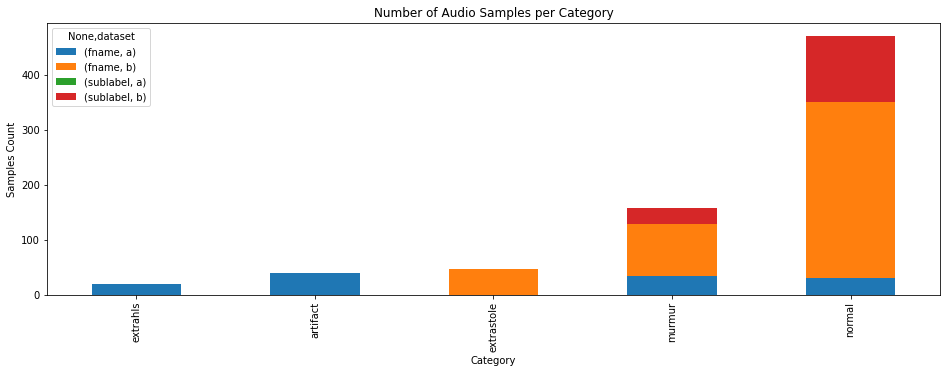

In [ ]:
# visualize data distribution by category
category_group = training_data.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label         0
sublabel    436
dtype: int64

In [ ]:
training_data = training_data.reset_index()


In [ ]:
training_data.drop("index",axis="columns",inplace=True)

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data.describe()

dataset                             fname   label     sublabel
count      585                               585     585          149
unique       2                               585       5            2
top          b  set_a/artifact__201012172012.wav  normal  noisynormal
freq       461                                 1     351          120

### EDA

In [ ]:
x=training_data.groupby("label")["label"].count().sort_values(ascending=False)
x

label
normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

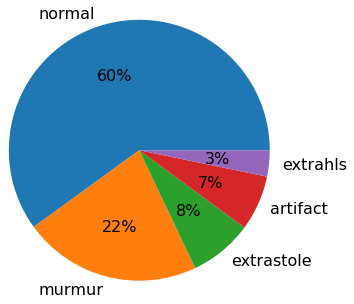

In [ ]:
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

### Timing


In [4]:
set_a_timing = pd.read_csv("/content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds/set_a_timing.csv" ,  delimiter=',')
set_a_timing.head(10)

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992
5  set_a/normal__201102081321.wav      3    S2     73729
6  set_a/normal__201102081321.wav      4    S1     88761
7  set_a/normal__201102081321.wav      4    S2    101646
8  set_a/normal__201102081321.wav      5    S1    115246
9  set_a/normal__201102081321.wav      5    S2    127415

In [ ]:
set_a_timing.describe()

cycle       location
count  390.000000     390.000000
mean     5.733333  164639.984615
std      3.732807   99310.875752
min      1.000000    2583.000000
25%      3.000000   82313.000000
50%      5.000000  155624.500000
75%      8.000000  239709.750000
max     19.000000  390873.000000

In [ ]:
set_a_timing.isnull().sum()

fname       0
cycle       0
sound       0
location    0
dtype: int64

In [ ]:
set_a_timing["fname"].value_counts()

set_a/normal__201105011626.wav    38
set_a/normal__201105021804.wav    30
set_a/normal__201103090635.wav    26
set_a/normal__201102081321.wav    24
set_a/normal__201108011118.wav    24
set_a/normal__201106221450.wav    22
set_a/normal__201108011112.wav    18
set_a/normal__201108011115.wav    18
set_a/normal__201104141251.wav    18
set_a/normal__201103140132.wav    18
set_a/normal__201105151450.wav    18
set_a/normal__201102260502.wav    16
set_a/normal__201106141148.wav    16
set_a/normal__201106221418.wav    16
set_a/normal__201105021654.wav    14
set_a/normal__201108011114.wav    14
set_a/normal__201106210943.wav    14
set_a/normal__201103140822.wav    12
set_a/normal__201103151912.wav    12
set_a/normal__201106111136.wav    12
set_a/normal__201103221214.wav    10
Name: fname, dtype: int64

In [ ]:
set_a_timing["sound"].value_counts()

S1    195
S2    195
Name: sound, dtype: int64

In [ ]:
set_a_timing["cycle"].value_counts()

1     42
3     42
4     42
5     42
2     42
6     40
7     34
8     28
9     22
11    12
10    12
12    10
13     6
14     4
15     4
16     2
17     2
18     2
19     2
Name: cycle, dtype: int64

## Categories

### Analysis of different heart sound categories

####  Waveform

Sound is the pressure of air propagates to our ear. Digital audio file is gotten from a sound sensor that can detects sound waves and converting it to electrical signals.

Specifically, it's telling us about the wave's displacement, and how it changes over time.

In [5]:
def plotAudio(audio_file, peaks):
  plt.figure(figsize=(16, 3))
  librosa.display.waveplot(audio_file, sr=22050)
  for peak in peaks:
    plt.axvline(peak/22050, ls=':', c='k')
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  return y, sr

In [6]:
def sampleCategory(audio_file, type):
  # Load use Librosa
  y, sr = librosa.load(audio_file)   #default sampling rate is 22 kHZ
  dur=librosa.get_duration(y)
  print ("duration:", dur)
  print(y.shape, sr)
  # librosa plot
  plt.figure(figsize=(16, 3))
  librosa.display.waveplot(y, sr=sr)
  plt.title(type)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  return y, sr

#### Spectrum

A sound spectrum is a representation of a sound – usually a short sample of a sound – in terms of the amount of vibration at each individual frequency. 

In [ ]:
def spectrumAnalysis(sound_sample, sample_rate):
  fft_normal = np.fft.fft(sound_sample)
  magnitude_normal = np.abs(fft_normal)
  freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
  half_freq = freq_normal[:int(len(freq_normal)/2)]
  half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

  plt.figure(figsize=(12,8))
  plt.plot(half_freq,half_magnitude)
  plt.title("Spectrum")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.show()

#### Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
For us, as human, we sense a sound not only on a particular time by its intensity, but also by its pitch. The pitch is the frequency of the sound - higher pitch corresponding to higher frequency and vice versa.

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

def spectogramAnalysis(sound_sample):
  # STFT -> spectrogram
  # calculate duration hop length and window in seconds
  hop_length_duration = float(hop_length)/sample_rate
  n_fft_duration = float(n_fft)/sample_rate

  print("STFT hop length duration is: {}s".format(hop_length_duration))
  print("STFT window duration is: {}s".format(n_fft_duration))

  # perform stft
  stft_normal = librosa.stft(sound_sample, n_fft=n_fft, hop_length=hop_length)

  # calculate abs values on complex numbers to get magnitude
  spectrogram = np.abs(stft_normal)
  log_spectrogram = librosa.amplitude_to_db(spectrogram)

  # display spectrogram
  plt.figure(figsize=(15,10))
  librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("Spectrogram")

#### MFCCS

MFCC is the widely used technique for extracting the features from the audio signal. In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.




In [ ]:
def MFCCAnlysis(sound_sample, sample_rate):
  # MFCCs
  # extract 25 MFCCs
  MFCCs = librosa.feature.mfcc(sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

  # display MFCCs
  plt.figure(figsize=(15,10))
  librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("MFCCs")

  # show plots
  plt.show()

### Normal

In the Normal category there are normal, healthy heart sounds

In [ ]:
normal_file = INPUT + "set_a/normal__201103090635.wav"

In [ ]:
ipd.Audio(normal_file) 

duration: 16.02784580498866
(353414,) 44100


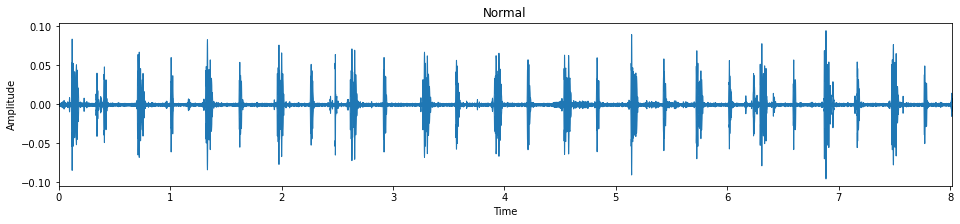

In [ ]:
sound_sample, sample_rate = sampleCategory(normal_file, "Normal")

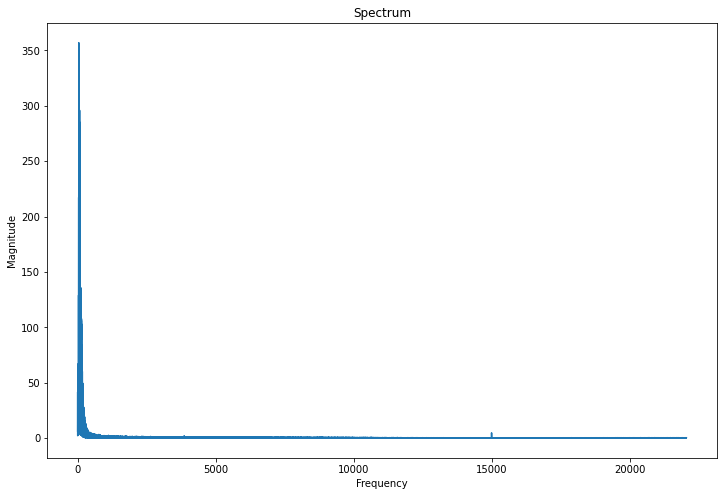

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


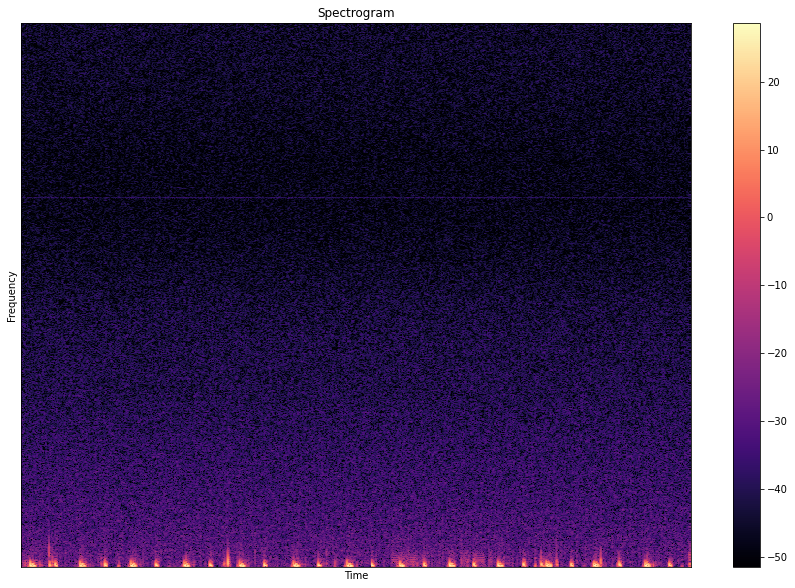

In [ ]:
spectogramAnalysis(sound_sample)

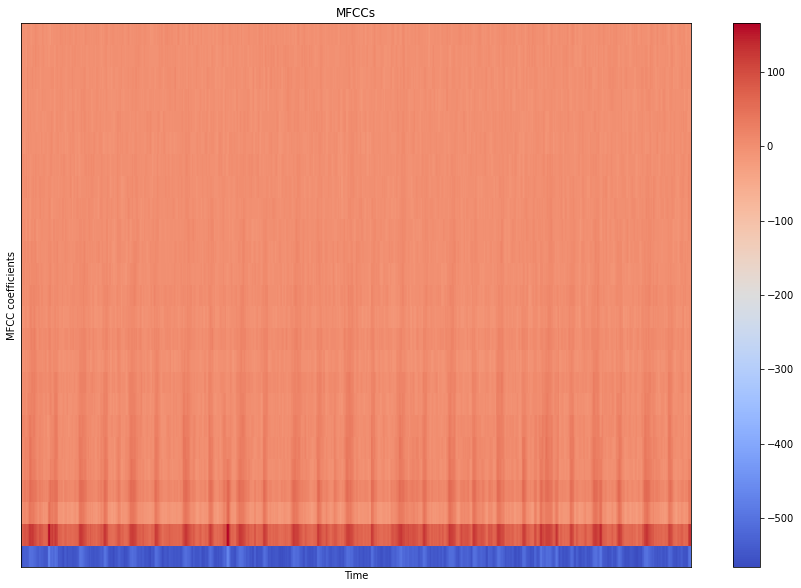

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Murmur

Heart murmurs are sounds — such as whooshing or swishing — made by rapid, choppy (turbulent) blood flow through the heart. The sounds can be heard with a device called a stethoscope.

In [ ]:
murmur_file = INPUT + "/set_a/murmur__201108222231.wav"

In [ ]:
ipd.Audio(murmur_file) 

duration: 7.935555555555555
(174979,) 22050


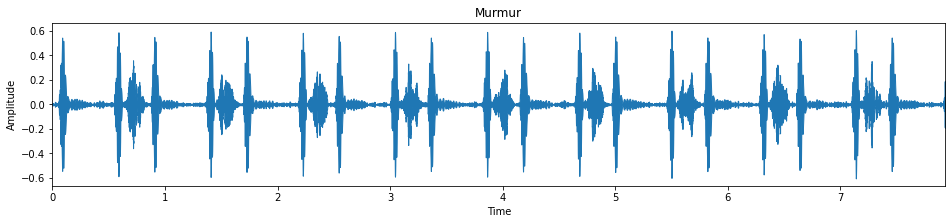

In [ ]:
sound_sample, sample_rate = sampleCategory(murmur_file, "Murmur")

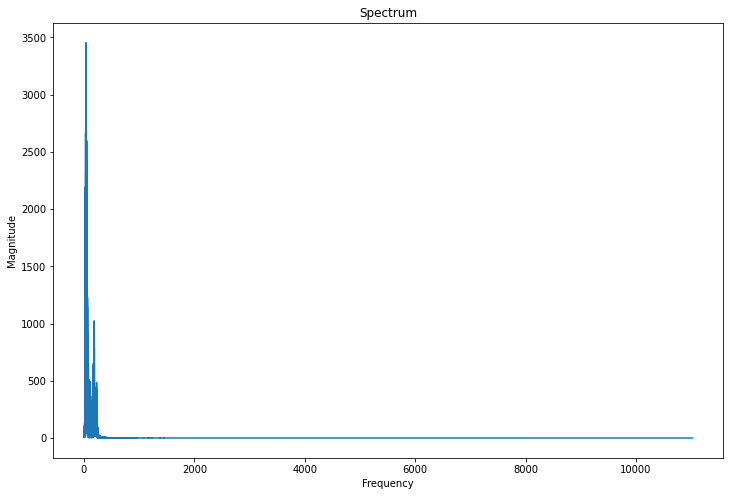

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


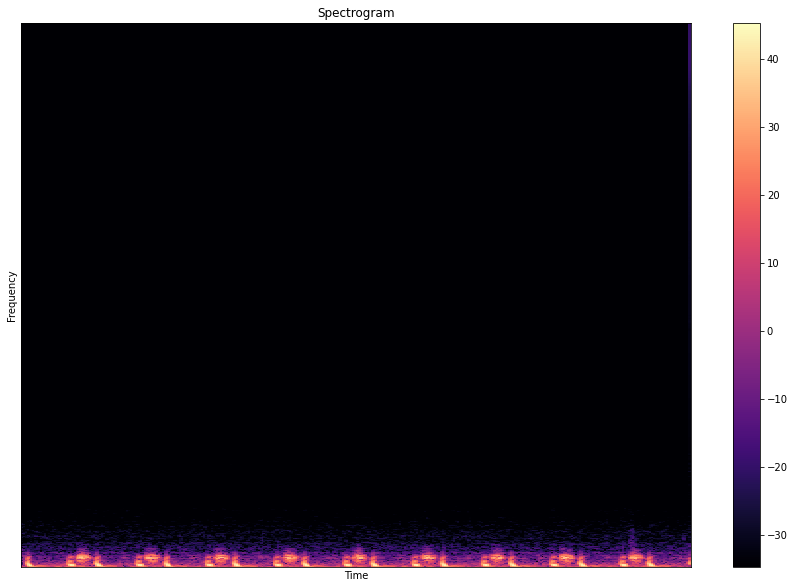

In [ ]:
spectogramAnalysis(sound_sample)

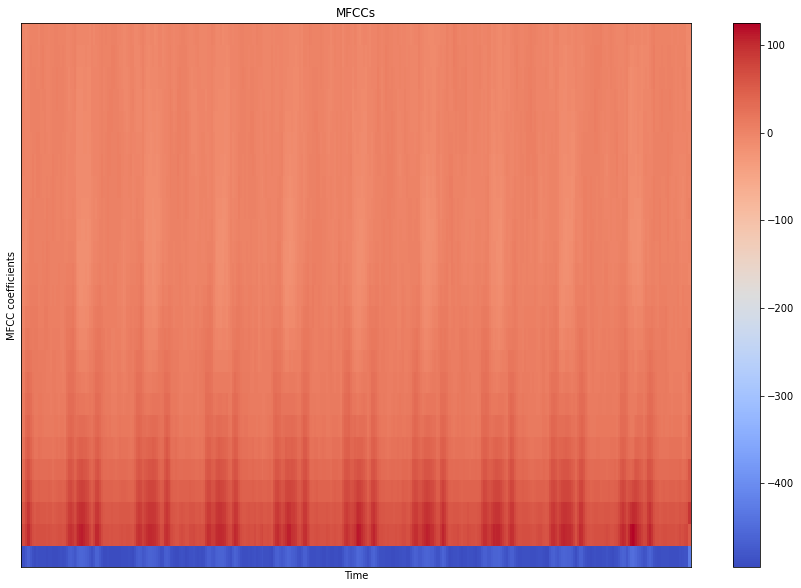

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extrasystole

The extrasystole is the HS that is produced by performing an extra beat in each heart cycle or a skipped beat, unlike the heartbeat normal cycle.

In [ ]:
extrastole_file = INPUT + "/set_b/extrastole__127_1306764300147_C2.wav"

In [ ]:
ipd.Audio(extrastole_file) 

duration: 4.676009070294785
(103106,) 22050


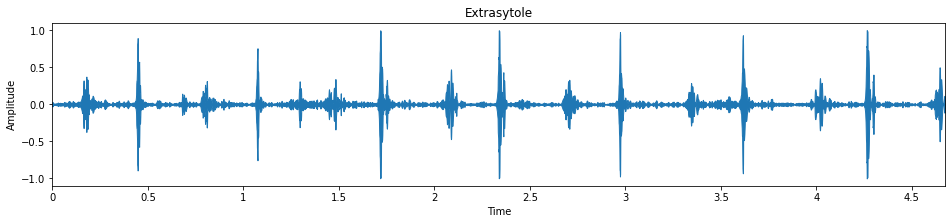

In [ ]:
sound_sample, sample_rate = sampleCategory(extrastole_file, "Extrasytole")

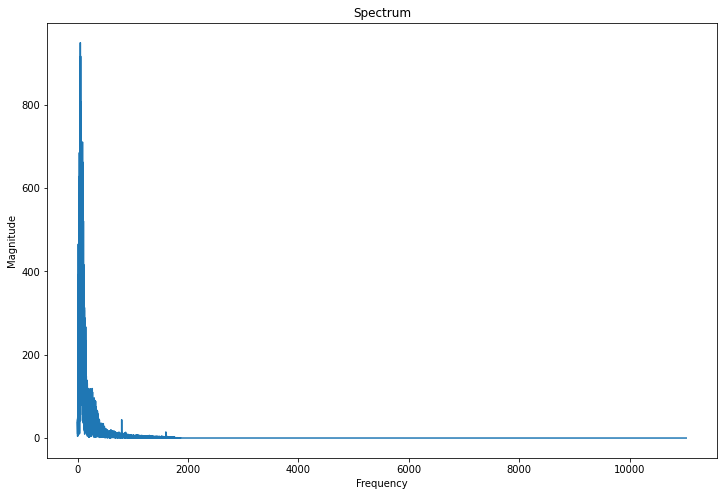

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


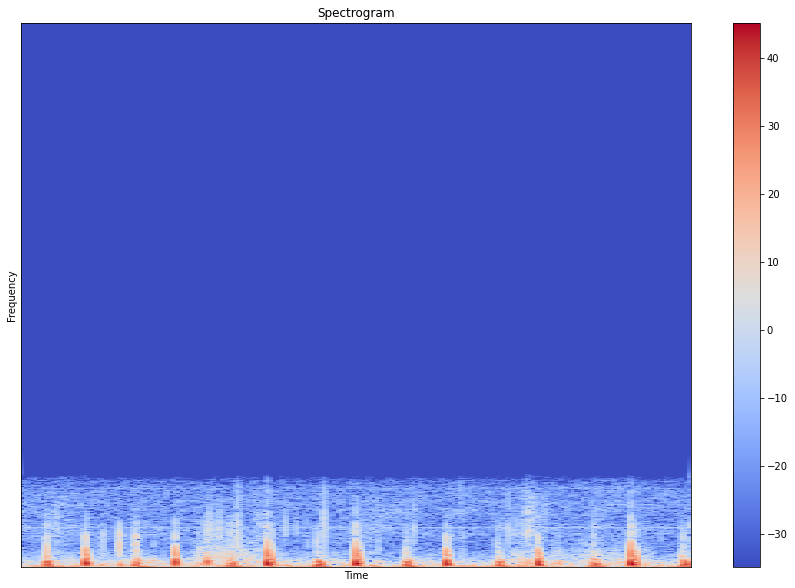

In [ ]:
spectogramAnalysis(sound_sample)

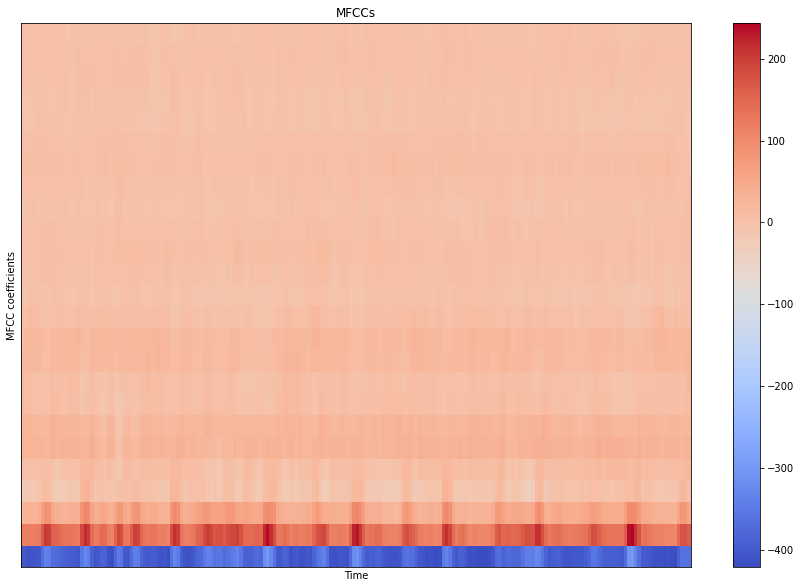

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Artifact

This includes a wide range of sounds that could not be identified as heart sounds that may indicate that try and collect data again

In [ ]:
artifact_file=INPUT + "/set_a/artifact__201012172012.wav"

In [ ]:
ipd.Audio(artifact_file) 

duration: 9.0
(198450,) 22050


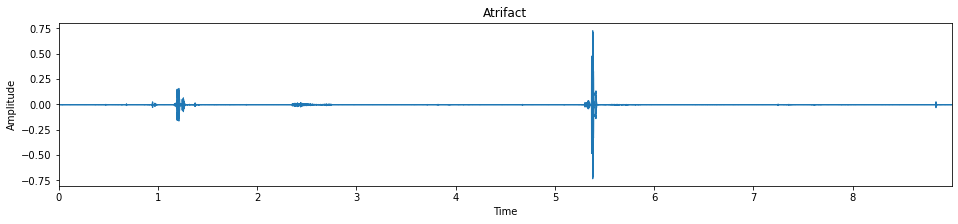

In [ ]:
sound_sample, sample_rate = sampleCategory(artifact_file, "Atrifact")

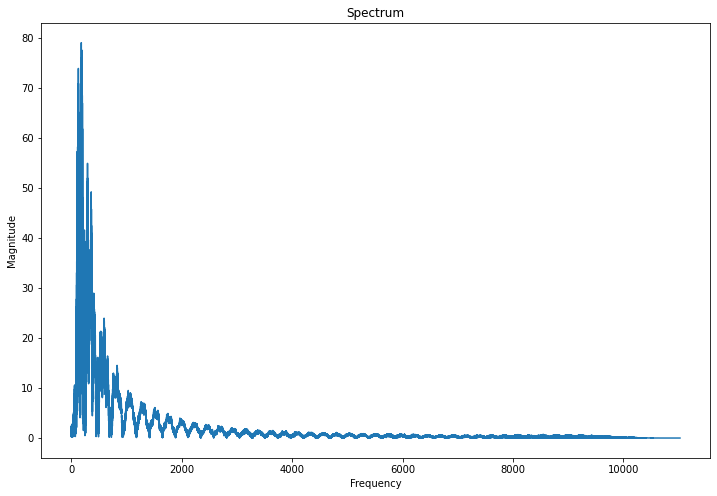

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


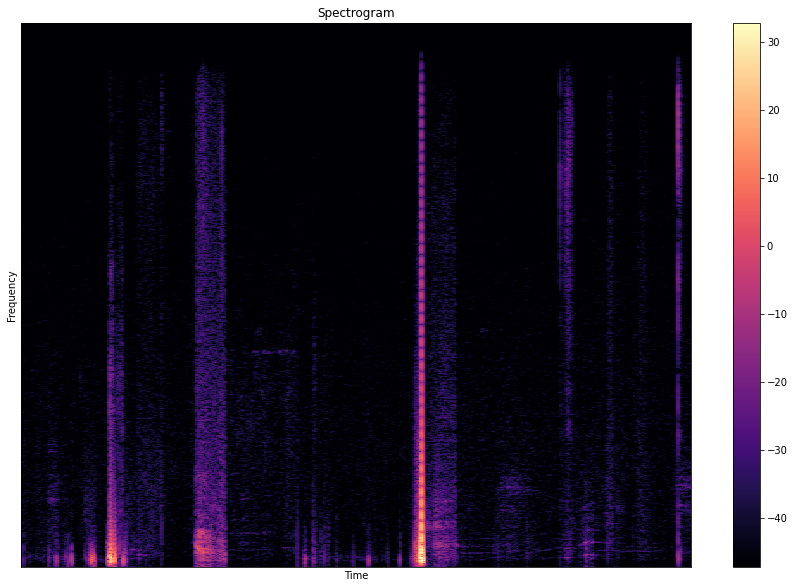

In [ ]:
spectogramAnalysis(sound_sample)

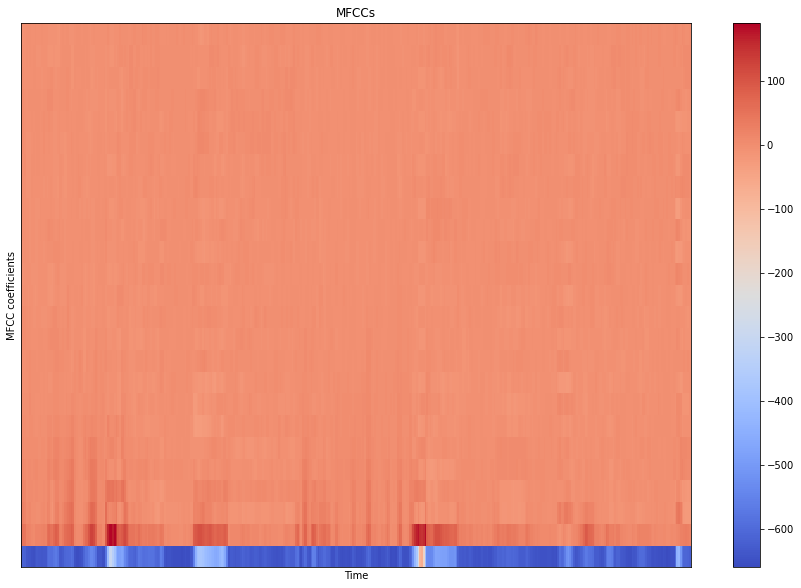

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extra Heart Sound

May include an extra sound

In [ ]:
extrahls_file=INPUT + "/set_a/extrahls__201101070953.wav"

In [ ]:
ipd.Audio(extrahls_file) 

duration: 8.88408163265306
(195894,) 22050


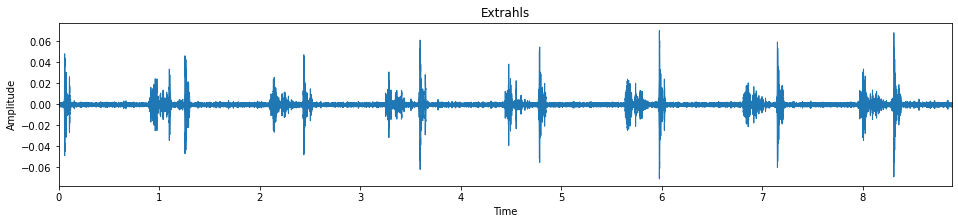

In [ ]:
sound_sample, sample_rate = sampleCategory(extrahls_file, "Extrahls")

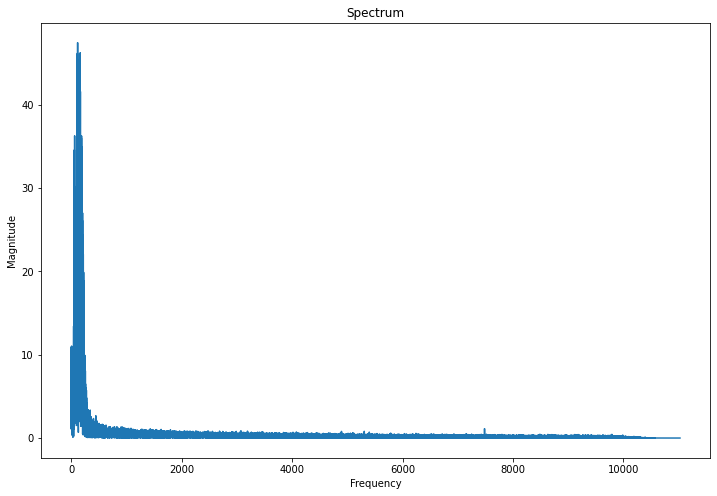

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


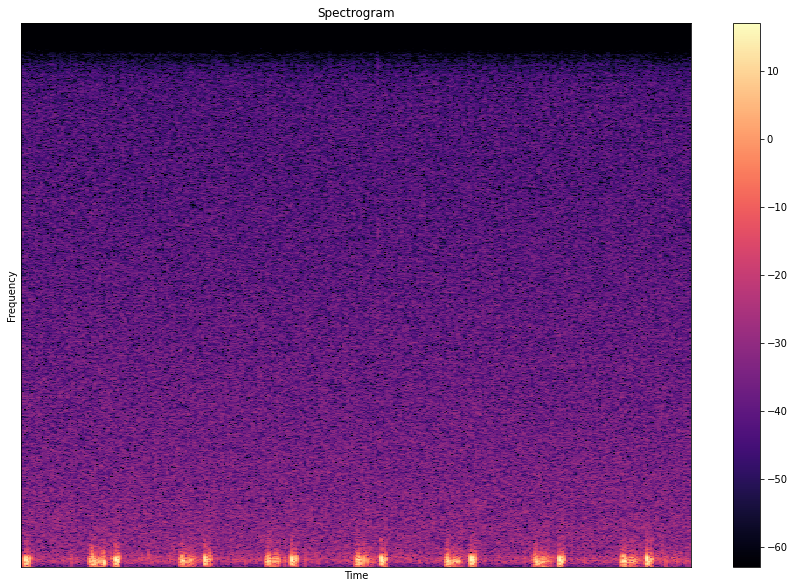

In [ ]:
spectogramAnalysis(sound_sample)

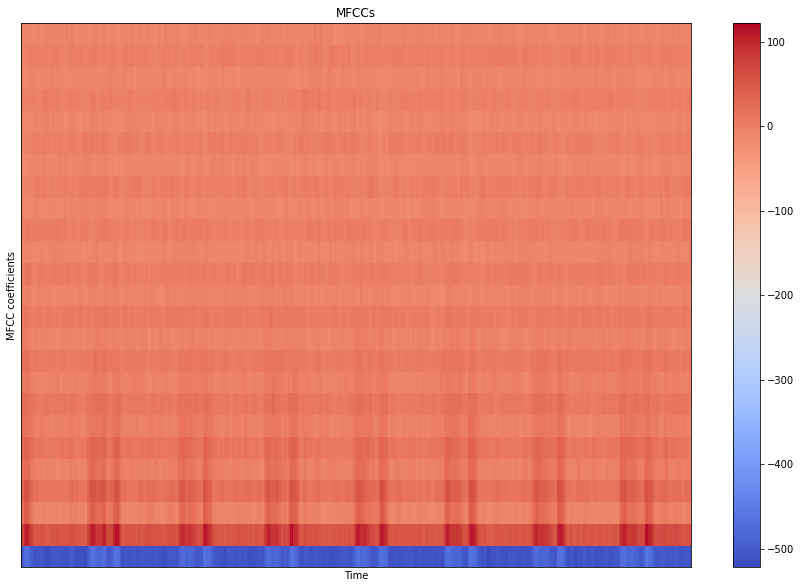

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

## Data Segmentation


In [7]:
set_a_timing_fnames = set_a_timing.fname.unique()
print(set_a_timing_fnames)

['set_a/normal__201102081321.wav' 'set_a/normal__201102260502.wav'
 'set_a/normal__201103090635.wav' 'set_a/normal__201103140132.wav'
 'set_a/normal__201103140822.wav' 'set_a/normal__201103151912.wav'
 'set_a/normal__201103221214.wav' 'set_a/normal__201104141251.wav'
 'set_a/normal__201105011626.wav' 'set_a/normal__201105021654.wav'
 'set_a/normal__201105021804.wav' 'set_a/normal__201105151450.wav'
 'set_a/normal__201106111136.wav' 'set_a/normal__201106141148.wav'
 'set_a/normal__201106210943.wav' 'set_a/normal__201106221418.wav'
 'set_a/normal__201106221450.wav' 'set_a/normal__201108011112.wav'
 'set_a/normal__201108011114.wav' 'set_a/normal__201108011115.wav'
 'set_a/normal__201108011118.wav']


In [ ]:
len(set_a_timing.fname.unique())

21

In [ ]:
set_a_timing.head(10)

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992
5  set_a/normal__201102081321.wav      3    S2     73729
6  set_a/normal__201102081321.wav      4    S1     88761
7  set_a/normal__201102081321.wav      4    S2    101646
8  set_a/normal__201102081321.wav      5    S1    115246
9  set_a/normal__201102081321.wav      5    S2    127415

In [ ]:
set_a_timing.shape

(390, 4)

In [ ]:
test = set_a_timing["fname"].value_counts()


In [ ]:
print(test['set_a/normal__201105011626.wav'])

38


In [8]:
data_x = []
data_y_s1 = []
data_y_s2 = []

set_a_timing_fnames = set_a_timing.fname.unique()
timing_counts = set_a_timing["fname"].value_counts()

i = 0
for fname in set_a_timing_fnames:
  print(f"Loading {fname}")
  data, sampling_rate = librosa.load(INPUT + fname, sr = 44100)
  j = 0
  while i<len(set_a_timing) and set_a_timing.iloc[i,0] == fname:
    try:
      if j==0:
        range_start1 = 0
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+2, 3])
      elif j==timing_counts[fname]-2:
        range_start1 = int(set_a_timing.iloc[i-1,3])
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+1, 3]) + 10000
      else:
        range_start1 = int(set_a_timing.iloc[i-1,3])
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+2, 3])

      rand_start = random.randrange(range_start1,range_start2)
      rand_end = random.randrange(range_end1,range_end2)        
      temp_data = data[rand_start: rand_end]
      # mfcc =  librosa.feature.mfcc(temp_data , sr=sampling_rate, n_mfcc=40)
      # mfccs = np.mean(librosa.feature.mfcc(y=temp_data, sr=sampling_rate, n_mfcc=40).T,axis=0)  
      # feature = np.array(mfccs).reshape([-1,1])

      # tmp = []
      # tmp.append(set_a_timing[i,2])
      # tmp.append(set_a_timing[i+1,2])
      s1_label = int(set_a_timing.iloc[i, 3]) - rand_start
      s2_label = int(set_a_timing.iloc[i+1, 3]) - rand_start

      data_x.append(temp_data)
      data_y_s1.append(s1_label)
      data_y_s2.append(s2_label)
    except:
      print(f"Error reading {i} {fname}")
      pass
    j += 2
    i += 2


Loading set_a/normal__201102081321.wav
Loading set_a/normal__201102260502.wav
Loading set_a/normal__201103090635.wav
Loading set_a/normal__201103140132.wav
Loading set_a/normal__201103140822.wav
Loading set_a/normal__201103151912.wav
Loading set_a/normal__201103221214.wav
Loading set_a/normal__201104141251.wav
Loading set_a/normal__201105011626.wav
Loading set_a/normal__201105021654.wav
Loading set_a/normal__201105021804.wav
Loading set_a/normal__201105151450.wav
Loading set_a/normal__201106111136.wav
Loading set_a/normal__201106141148.wav
Loading set_a/normal__201106210943.wav
Loading set_a/normal__201106221418.wav
Loading set_a/normal__201106221450.wav
Loading set_a/normal__201108011112.wav
Loading set_a/normal__201108011114.wav
Loading set_a/normal__201108011115.wav
Loading set_a/normal__201108011118.wav


In [91]:
myMax = 0
for row in data_x:
  myMax = max(myMax, len(row))
print(myMax)

69331


In [10]:
len(data_x)

195

In [ ]:
data_x[100].shape

(40, 62)

NameError: ignored

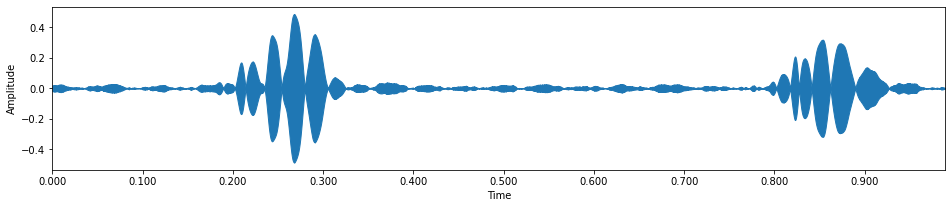

In [ ]:
plotAudio(data_x[20], [])

#### Padding

In [11]:
#preprocess the data
from keras_preprocessing.sequence import pad_sequences

train_x = pad_sequences(data_x, maxlen=myMax, dtype='float', padding='post', truncating='post', value=0.001)
train_x = pd.DataFrame(np.row_stack(train_x))

train_x = train_x / np.max(train_x)

# train_x = train_x[:,:,np.newaxis]
train_y_s1 = pd.DataFrame(data_y_s1)
train_y_s2 = pd.DataFrame(data_y_s2)


train_y_s1 = train_y_s1/44100
train_y_s2 = train_y_s2/44100

train_y_s1.columns = ['s1']
train_y_s2.columns = ['s2']
train_y = train_y_s1
train_y['s2'] = train_y_s2['s2']

# print(data_y.value_counts())

# data_y = data_y.map({'S1':0, 'S2':1}).values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

In [46]:
x_train

0         1         2         3         4         5         6      \
38   0.000478 -0.000475 -0.000235 -0.001053  0.000000  0.000000  0.000458   
31   0.339064  0.338000  0.336983  0.335049  0.333991  0.334987  0.333486   
173  0.063634  0.063234  0.062875  0.062683  0.062130  0.062176  0.061498   
12  -0.018863 -0.020406 -0.020252 -0.021635 -0.020903 -0.022148 -0.021645   
109  0.041189  0.040337  0.039209  0.040229  0.039020  0.037721  0.037448   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.025907  0.027761  0.029671  0.030172  0.028336  0.028262  0.024622   
14   0.000836  0.000237  0.001177  0.000819  0.001394  0.000923  0.000802   
92   0.040950  0.035829  0.018015  0.014384  0.030891  0.038413  0.034929   
179  0.071633  0.060149  0.048275  0.037306  0.025665  0.016380  0.005039   
102 -0.001313 -0.002373  0.000000  0.001053  0.004413  0.001384 -0.000458   

        7         8         9      ...  69321  69322  69323  69324  69325  \
38   0.000114  0.000113 -0.000337  ...    1.0    1.0    1.0    1.0    1.0   
31   0.334281  0.334388  0.333071  ...    1.0    1.0    1.0    1.0    1.0   
173  0.061554  0.061476  0.061089  ...    1.0    1.0    1.0    1.0    1.0   
12  -0.021845 -0.021923 -0.022010  ...    1.0    1.0    1.0    1.0    1.0   
109  0.039595  0.038648  0.036609  ...    1.0    1.0    1.0    1.0    1.0   
..        ...       ...       ...  ...    ...    ...    ...    ...    ...   
106  0.026283  0.028591  0.037844  ...    1.0    1.0    1.0    1.0    1.0   
14   0.000455  0.000452  0.000337  ...    1.0    1.0    1.0    1.0    1.0   
92   0.025145  0.018081  0.016395  ...    1.0    1.0    1.0    1.0    1.0   
179 -0.005348 -0.015369 -0.025828  ...    1.0    1.0    1.0    1.0    1.0   
102 -0.000455  0.003616  0.002021  ...    1.0    1.0    1.0    1.0    1.0   

     69326  69327  69328  69329  69330  
38     1.0    1.0    1.0    1.0    1.0  
31     1.0    1.0    1.0    1.0    1.0  
173    1.0    1.0    1.0    1.0    1.0  
12     1.0    1.0    1.0    1.0    1.0  
109    1.0    1.0    1.0    1.0    1.0  
..     ...    ...    ...    ...    ...  
106    1.0    1.0    1.0    1.0    1.0  
14     1.0    1.0    1.0    1.0    1.0  
92     1.0    1.0    1.0    1.0    1.0  
179    1.0    1.0    1.0    1.0    1.0  
102    1.0    1.0    1.0    1.0    1.0  

[136 rows x 69331 columns]

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

### Model 2

In [ ]:
def base_model(inputs):
    x= Dense(500, activation='tanh')(inputs)
    x= Dense(500, activation='tanh')(x)
    x= Dense(300, activation='tanh')(x)
    x= Dense(300, activation='tanh')(x)
    x= Dense(300, activation='tanh')(x)
    x= Dense(300, activation='tanh')(x)
    x= Dense(150, activation='tanh')(x)
    x= Dense(150, activation='tanh')(x)
    return x
    
def final_model(inputs):
    x = base_model(inputs)
    s1 = Dense(units='1', name='s1')(x)
    
    s2 = Dense(units='1', name='s2')(x)

    model = Model(inputs=inputs, outputs = [s1, s2])
    
    return model

In [22]:
y_train_np =(np.array(y_train['s1']),np.array(y_train['s2']))
y_val_np = (np.array(y_val['s1']), np.array(y_val['s2']))

In [ ]:
inputs = tf.keras.layers.Input(shape=(myMax,))
model = final_model(inputs)
model.compile(optimizer='adam', 
             loss = {'s1': 'mse',
                    's2': 'mse'},
             metrics={'s1': tf.keras.metrics.RootMeanSquaredError(),
                     's2': tf.keras.metrics.RootMeanSquaredError()})


In [ ]:
history = model.fit(x_train, y_train_np, 
                   epochs=20, validation_data=(x_val, y_val_np))

Epoch 1/20
5/5 [==============================] - 1s 253ms/step - loss: 0.0794 - s1_loss: 0.0273 - s2_loss: 0.0521 - s1_root_mean_squared_error: 0.1652 - s2_root_mean_squared_error: 0.2283 - val_loss: 0.0530 - val_s1_loss: 0.0265 - val_s2_loss: 0.0265 - val_s1_root_mean_squared_error: 0.1628 - val_s2_root_mean_squared_error: 0.1629
Epoch 2/20
5/5 [==============================] - 1s 228ms/step - loss: 0.0823 - s1_loss: 0.0277 - s2_loss: 0.0547 - s1_root_mean_squared_error: 0.1663 - s2_root_mean_squared_error: 0.2338 - val_loss: 0.0498 - val_s1_loss: 0.0230 - val_s2_loss: 0.0269 - val_s1_root_mean_squared_error: 0.1516 - val_s2_root_mean_squared_error: 0.1639
Epoch 3/20
5/5 [==============================] - 1s 279ms/step - loss: 0.0822 - s1_loss: 0.0278 - s2_loss: 0.0543 - s1_root_mean_squared_error: 0.1668 - s2_root_mean_squared_error: 0.2331 - val_loss: 0.0481 - val_s1_loss: 0.0230 - val_s2_loss: 0.0251 - val_s1_root_mean_squared_error: 0.1518 - val_s2_root_mean_squared_error: 0.158

In [ ]:
loss, price_loss, noc_loss, price_root_mean_squared_error, noc_accuracy = model.evaluate(x=x_val, y=y_val_np)
print()
print(f'loss: {loss}')
print(f'price_loss: {price_loss}')
print(f'noc_loss: {noc_loss}')
print(f'price_root_mean_squared_error: {price_root_mean_squared_error}')
print(f'noc_accuracy: {noc_accuracy}')

1/1 [==============================] - 0s 97ms/step - loss: 0.0491 - s1_loss: 0.0242 - s2_loss: 0.0248 - s1_root_mean_squared_error: 0.1557 - s2_root_mean_squared_error: 0.1576

loss: 0.04909227415919304
price_loss: 0.024247948080301285
noc_loss: 0.024844326078891754
price_root_mean_squared_error: 0.15571752190589905
noc_accuracy: 0.15762083232402802


In [16]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(128, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Flatten())
  model.add(Dense(n_outputs))
  model.compile(loss='mae', optimizer='adam')
  return model

In [ ]:
# model = get_model(65000, 2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70597)]      0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          9036544     ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 s1 (Dense)                     (None, 1)            129         ['dense[0][0]']                  
                                                                                              

In [ ]:
# history = model.fit(train_x, (train_y_s1,train_y_s2), verbose=0, epochs=10)
history=model.fit(data_x[:80], (train_y_s1[:80],train_y_s2[:80]), 
                  batch_size=10, 
                  epochs=10,
                  validation_data=(data_x[80:85], (train_y_s1[80:85],train_y_s2[80:85])))


ValueError: ignored

In [ ]:
# make a prediction
y_pred = model.predict(train_x[:5], batch_size=5)
#check scores
scores = model.evaluate(train_x[:5], (train_y_s1[:5],train_y_s2[:5]))
# print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

1/1 [==============================] - 0s 25ms/step - loss: nan


In [ ]:
print(scores)

nan


In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

KeyError: ignored

In [ ]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
  results = list()
  n_inputs, n_outputs = X.shape[1], y.shape[1]
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # enumerate folds
  for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # define model
    model = get_model(n_inputs, n_outputs)
    # fit model
    model.fit(X_train, y_train, verbose=0, epochs=100)
    # evaluate model on test set
    mae = model.evaluate(X_test, y_test, verbose=0)
    # store result
    print('>%.3f' % mae)
    results.append(mae)
  return results

In [ ]:
# evaluate model
results = evaluate_model(train_x, (train_y_s1, train_y_s2))
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:
np.array(y_train['s1'])

### CNN

In [19]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf

In [ ]:
def make_default_hidden_layers(inputs):
    """
    Used to generate a default set of hidden layers. The structure used in this network is defined as:
    
    Conv2D -> BatchNormalization -> Pooling -> Dropout
    """
    x = Conv1D(16, 3)(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling1D(pool_size=3)(x)
    x = Dropout(0.25)(x)
    x = Conv1D(32, 3)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.25)(x)
    x = Conv1D(32, 3)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.25)(x)
    return x

def build_s1_branch( inputs):   
        """
        Used to build the age branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="s1")(x)
        return x

def build_s2_branch( inputs):   
        """
        Used to build the age branch of our face recognition network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="s2")(x)
        return x

def assemble_full_model(myMax):
        """
        Used to assemble our multi-output model CNN.
        """
        inputs = Input(shape=(195,myMax,))
        s1_branch = build_s1_branch(inputs)
        s2_branch = build_s2_branch(inputs)


        model = Model(inputs=inputs,
                     outputs = [s1_branch, s2_branch],
                     name="face_net")
        return model


model = assemble_full_model(myMax)

In [ ]:
from keras.optimizers import Adam
init_lr = 1e-4
epochs = 20
opt = Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(optimizer=opt, 
              loss={
                  's1_output': 'mse', 
                  's2_output': 'mse'},
              loss_weights={
                  's1_output': 2., 
                  's2_output': 2.}, 
              metrics={
                  's1_output': 'mae', 
                  's2_output': 'accuracy'})

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint
batch_size = 32
valid_batch_size = 32
# Train the model for 100 epochs
history = model.fit(x_train, y_train_np,
   epochs=20, batch_size=10, validation_data=(x_val, y_val_np))

### CNN 2

In [53]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

In [56]:
def padding(array, xx, yy):
  """
  :param array: numpy array
  :param xx: desired height
  :param yy: desirex width
  :return: padded array
  """
  h = array.shape[0]
  w = array.shape[1]
  a = max((xx - h) // 2,0)
  aa = max(0,xx - a - h)
  b = max(0,(yy - w) // 2)
  bb = max(yy - b - w,0)
  return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [162]:
def generate_features(y_cut):
    max_size=1000 #my max audio file feature width
    stft = padding(np.abs(librosa.stft(y_cut, n_fft=255, hop_length = 512)), 128, max_size)
    # print(stft)
    MFCCs = padding(librosa.feature.mfcc(y_cut, n_fft=255, hop_length=512,n_mfcc=128),128,max_size)
    # print(MFCCs)

    spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=SAMPLE_RATE)
    # print(spec_centroid)

    chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=SAMPLE_RATE)
    # print(chroma_stft)

    spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=SAMPLE_RATE)
    #Now the padding part
    image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
    image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
    #repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized
    for i in range(0,9):
        image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
        image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
        image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
    image=np.dstack((image,np.abs(stft)))
    image=np.dstack((image,MFCCs))
    return image

In [60]:
data_x[0]

array([ 0.00421143,  0.00552368,  0.00497437, ..., -0.00302124,
       -0.00231934, -0.00234985], dtype=float32)

In [233]:
train_x = pd.DataFrame(data_x)

# train_x = train_x[:,:,np.newaxis]
train_y_s1 = pd.DataFrame(data_y_s1)
train_y_s2 = pd.DataFrame(data_y_s2)

train_x = train_x / np.max(train_x)

train_y_s1 = train_y_s1/44100
train_y_s2 = train_y_s2/44100

train_y_s1.columns = ['s1']
train_y_s2.columns = ['s2']
train_y = train_y_s1
train_y['s2'] = train_y_s2['s2']

In [119]:
train_x.iloc[0]

0        0.004211
1        0.005524
2        0.004974
3        0.004730
4        0.004791
           ...   
69326         NaN
69327         NaN
69328         NaN
69329         NaN
69330         NaN
Name: 0, Length: 69331, dtype: float64

In [234]:
x_train, x_test, y_train, y_test = train_test_split(data_x, train_y, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

In [134]:
x_train[0]

array([ 1.2207031e-04, -1.2207031e-04, -6.1035156e-05, ...,
        1.5258789e-04,  2.1362305e-04,  4.2724609e-04], dtype=float32)

In [156]:
def get_features(df_in):   
  features=[]     
  labels = [] #empty array to store labels     
  #For each species, determine how many augmentations are needed
  # df_in=df_in.reset_index()     
  # for i in df_in.fname.unique():
  #        print('fname:',i)    
  #        #all the file indices with the same species_id     
  #        filelist = df_in.loc[df_in.fname == i].index         
  for j in range(0,len(df_in)):    
      # filename = df_in.iloc[filelist[j]].fname #get the filename   
      #define the beginning time of the signal          
      # tstart = df_in.iloc[filelist[j]].t_min             
      # tend = df_in.iloc[filelist[j]].t_max #end of signal
      # recording_id = df_in.iloc[filelist[j]].recording_id
      # species_id = i
      # songtype_id = df_in.iloc[filelist[j]].songtype_id   
      #Load the file
      # y, sr = librosa.load(filename,sr=28000)  
      #cut the file to signal start and end  
      # y_cut=y[int(round(tstart*sr)):int(round(tend*sr))]  
      #generate features & output numpy array  
      # print(df_in[j])
      data = generate_features(df_in[j])

      features.append(data[np.newaxis,...])    
      # labels.append(species_id)     
  output=np.concatenate(features,axis=0)     
  return(np.array(output))



In [235]:
#use get_features to calculate and store the features
test_features = get_features(x_test)
train_features = get_features(x_train)
val_features = get_features(x_val)

In [ ]:
#Normalize
X_train = np.array((X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)))
X_test = np.array((X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)))
X_train = X_train/np.std(X_train)
X_test = X_test/np.std(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [164]:
train_features.shape

(136, 128, 1000, 3)

In [237]:
input_shape=(128,1000,3)
CNNmodelS1 = models.Sequential()
CNNmodelS1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodelS1.add(layers.MaxPooling2D((2, 2)))
CNNmodelS1.add(layers.Dropout(0.2))
CNNmodelS1.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodelS1.add(layers.MaxPooling2D((2, 2)))
CNNmodelS1.add(layers.Dropout(0.2))
CNNmodelS1.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodelS1.add(layers.Flatten())
CNNmodelS1.add(layers.Dense(64, activation='relu'))
CNNmodelS1.add(layers.Dropout(0.2))
CNNmodelS1.add(layers.Dense(32, activation='relu'))
CNNmodelS1.add(layers.Dense(1, activation='linear'))

In [206]:
input_shape=(128,1000,3)
CNNmodelS2 = models.Sequential()
CNNmodelS2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodelS2.add(layers.MaxPooling2D((2, 2)))
CNNmodelS2.add(layers.Dropout(0.2))
CNNmodelS2.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodelS2.add(layers.MaxPooling2D((2, 2)))
CNNmodelS2.add(layers.Dropout(0.2))
CNNmodelS2.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodelS2.add(layers.Flatten())
CNNmodelS2.add(layers.Dense(64, activation='relu'))
CNNmodelS2.add(layers.Dropout(0.2))
CNNmodelS2.add(layers.Dense(32, activation='relu'))
CNNmodelS2.add(layers.Dense(1, activation='linear'))

In [238]:
CNNmodelS1.compile(optimizer='adam',loss=tf.keras.losses.MSE,metrics=['accuracy'])
CNNmodelS2.compile(optimizer='adam',loss=tf.keras.losses.MSE,metrics=['accuracy'])

In [210]:
CNNmodelS2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 998, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 499, 32)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 63, 499, 32)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 497, 64)       18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 248, 64)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 30, 248, 64)      

In [239]:
history = CNNmodelS1.fit(train_features, y_train['s1'], epochs=10, validation_data= (val_features, y_val['s1']))

Epoch 1/10
5/5 [==============================] - 34s 7s/step - loss: 754.1357 - accuracy: 0.0000e+00 - val_loss: 0.0404 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 32s 6s/step - loss: 2.6786 - accuracy: 0.0000e+00 - val_loss: 0.0511 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 32s 6s/step - loss: 0.9460 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 35s 7s/step - loss: 0.4853 - accuracy: 0.0000e+00 - val_loss: 0.0859 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 32s 6s/step - loss: 0.1277 - accuracy: 0.0000e+00 - val_loss: 0.0893 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 32s 6s/step - loss: 0.0767 - accuracy: 0.0000e+00 - val_loss: 0.1001 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 32s 6s/step - loss: 0.0510 - accuracy: 0.0000e+00 - val_loss: 0.0619 - v

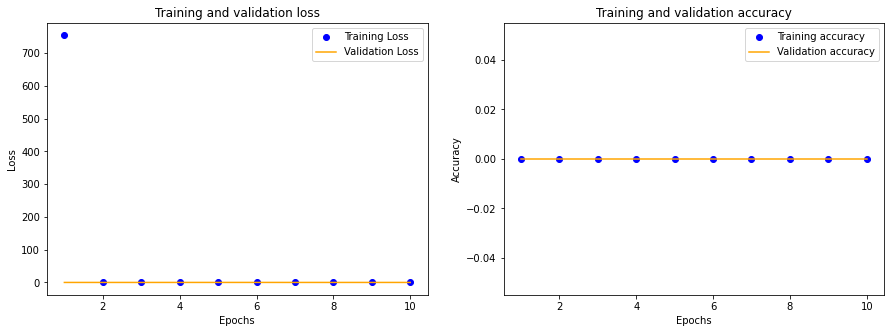

In [240]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,11)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [183]:
x_test[0]

array([ 0.07495117,  0.07473755,  0.07418823, ..., -0.01071167,
       -0.0111084 , -0.01062012], dtype=float32)

In [232]:
max(y_train['s1'])

0.870249433106576

1/1 [==============================] - 3s 3s/step


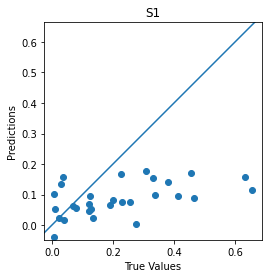

In [241]:
# Run predict
Y_pred = CNNmodelS1.predict(test_features)
s1 = Y_pred
plot_diff(y_test['s1'], Y_pred, title='S1')


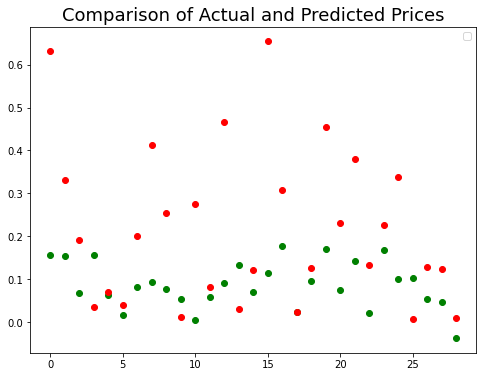

In [243]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s1)), s1.flatten(), color='green')
plt.scatter(range(len(s1)), np.array(y_test['s1']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

In [216]:
history2 = CNNmodelS2.fit(train_features, y_train['s2'], epochs=10, validation_data= (val_features, y_val['s2']))

Epoch 1/10
5/5 [==============================] - 34s 6s/step - loss: 0.0668 - accuracy: 0.0000e+00 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 32s 6s/step - loss: 0.0421 - accuracy: 0.0000e+00 - val_loss: 0.1014 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 35s 6s/step - loss: 0.0417 - accuracy: 0.0000e+00 - val_loss: 0.1205 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 33s 6s/step - loss: 0.0445 - accuracy: 0.0000e+00 - val_loss: 0.1111 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 33s 6s/step - loss: 0.0395 - accuracy: 0.0000e+00 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 33s 6s/step - loss: 0.0433 - accuracy: 0.0000e+00 - val_loss: 0.0924 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 35s 7s/step - loss: 0.0382 - accuracy: 0.0000e+00 - val_loss: 0.0951 - val

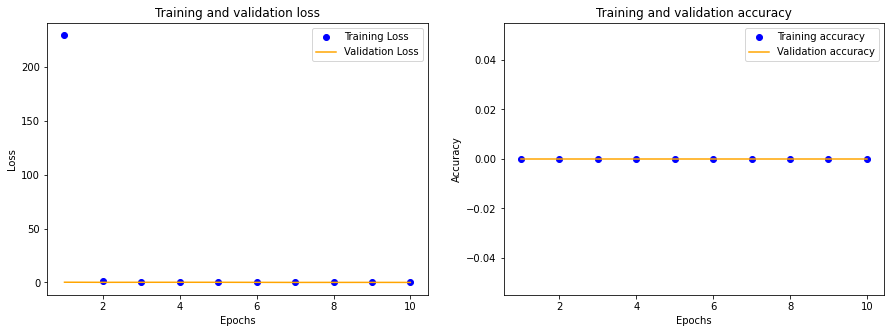

In [212]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history2.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,11)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

2/2 [==============================] - 6s 2s/step


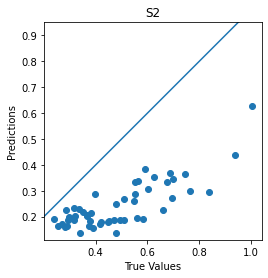

In [223]:
# Run predict
Y_pred = CNNmodelS2.predict(train_features[:50])
s2 = Y_pred
plot_diff(y_train['s2'][:50], Y_pred, title='S2')


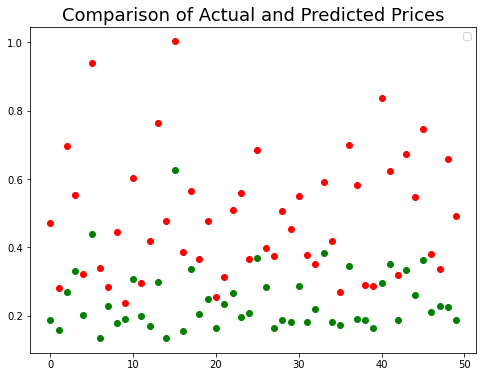

In [225]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s2)), s2.flatten(), color='green')
plt.scatter(range(len(s2)), np.array(y_train['s2'][:50]), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

### FNN

In [47]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(myMax,))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='s1')(first_dense)    
    second_dense = Dense(units='128',activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1',name='s2')(second_dense)    
    # Define the model with the input layer 
    # and a list of output layers
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model

In [48]:
model = build_model()
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.00001)
model.compile(optimizer=optimizer,
              loss={'s1': 'mse', 's2': 'mse'},
 metrics={'s1':tf.keras.metrics.RootMeanSquaredError(),
          's2':tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
# Train the model for 100 epochs
history = model.fit(x_train, y_train_np,
   epochs=30, batch_size=10, validation_data=(x_val, y_val_np))

Epoch 1/30
14/14 [==============================] - 1s 56ms/step - loss: 0.7642 - s1_loss: 0.5289 - s2_loss: 0.2353 - s1_root_mean_squared_error: 0.7272 - s2_root_mean_squared_error: 0.4851 - val_loss: 0.5886 - val_s1_loss: 0.1400 - val_s2_loss: 0.4486 - val_s1_root_mean_squared_error: 0.3741 - val_s2_root_mean_squared_error: 0.6698
Epoch 2/30
14/14 [==============================] - 1s 41ms/step - loss: 0.3140 - s1_loss: 0.1736 - s2_loss: 0.1404 - s1_root_mean_squared_error: 0.4167 - s2_root_mean_squared_error: 0.3747 - val_loss: 0.5084 - val_s1_loss: 0.0633 - val_s2_loss: 0.4451 - val_s1_root_mean_squared_error: 0.2516 - val_s2_root_mean_squared_error: 0.6672
Epoch 3/30
14/14 [==============================] - 1s 40ms/step - loss: 0.2315 - s1_loss: 0.1264 - s2_loss: 0.1051 - s1_root_mean_squared_error: 0.3555 - s2_root_mean_squared_error: 0.3242 - val_loss: 0.4971 - val_s1_loss: 0.0535 - val_s2_loss: 0.4436 - val_s1_root_mean_squared_error: 0.2313 - val_s2_root_mean_squared_error: 0.

In [24]:
# Test the model and print loss and rmse for both outputs
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse=model.evaluate(x=x_val, y=(y_val['s1'],y_val['s2']))
print("")
print(f'loss: {loss}')
print(f'S1_loss: {Y1_loss}')
print(f'S2_loss: {Y2_loss}')
print(f'S1: {Y1_rmse}')
print(f'S2: {Y2_rmse}')

1/1 [==============================] - 1s 982ms/step - loss: 0.7196 - s1_loss: 0.6942 - s2_loss: 0.0254 - s1_root_mean_squared_error: 0.8332 - s2_root_mean_squared_error: 0.1594

loss: 0.7195899486541748
S1_loss: 0.6941700577735901
S2_loss: 0.02541988156735897
S1: 0.8331686854362488
S2: 0.15943613648414612


In [25]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

1/1 [==============================] - 0s 81ms/step


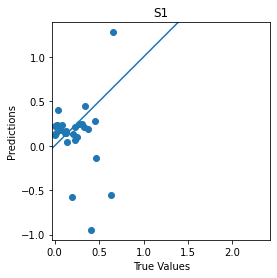

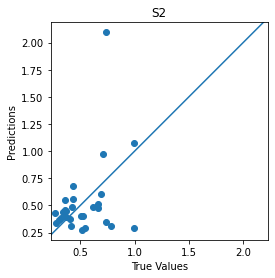

In [50]:
# Run predict
Y_pred = model.predict(x_test)
s1 = Y_pred[0]
s2 = Y_pred[1]
plot_diff(y_test['s1'], Y_pred[0], title='S1')
plot_diff(y_test['s2'], Y_pred[1], title='S2')

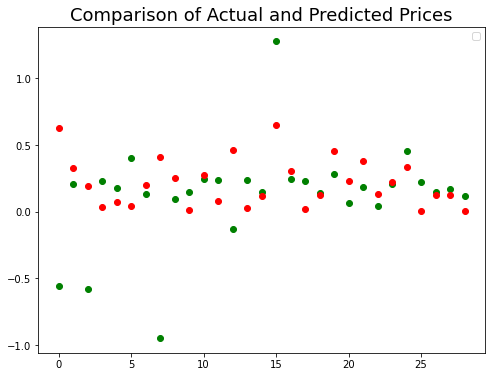

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s1)), s1.flatten(), color='green')
plt.scatter(range(len(s1)), np.array(y_test['s1']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

In [ ]:
min(train_y_s1['s2'])

0.2356689342403628

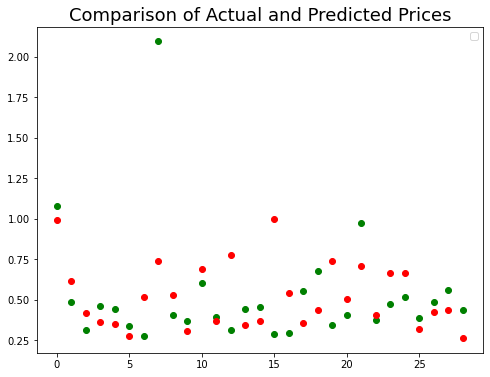

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s2)), s2.flatten(), color='green')
plt.scatter(range(len(s2)), np.array(y_test['s2']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

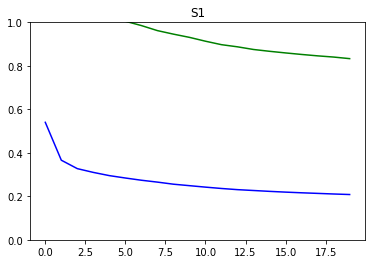

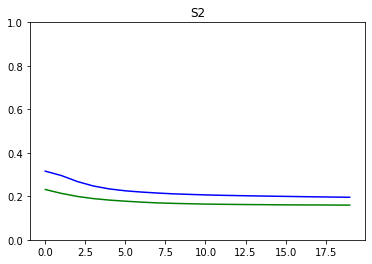

In [29]:
# Plot RMSE
plot_metrics(metric_name='s1_root_mean_squared_error', title='S1', ylim=1)
plot_metrics(metric_name='s2_root_mean_squared_error', title='S2', ylim=1)

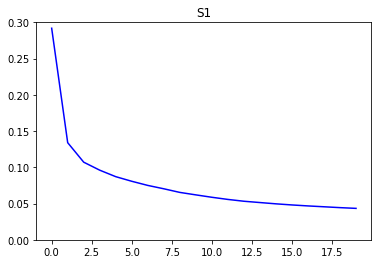

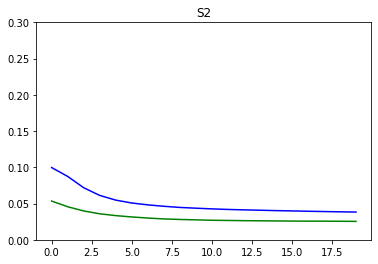

In [30]:
# Plot RMSE
plot_metrics(metric_name='s1_loss', title='S1', ylim=0.3)
plot_metrics(metric_name='s2_loss', title='S2', ylim=0.3)

In [36]:
x_test.iloc[:1]

0         1         2         3         4         5         6      \
172  0.293219  0.290545  0.286236  0.283359  0.279178  0.276156  0.272103   

        7         8         9      ...  69321  69322  69323  69324  69325  \
172  0.268859  0.265454  0.261763  ...    1.0    1.0    1.0    1.0    1.0   

     69326  69327  69328  69329  69330  
172    1.0    1.0    1.0    1.0    1.0  

[1 rows x 69331 columns]

In [37]:
Y_pred = model.predict(x_test.iloc[:1])

1/1 [==============================] - 0s 42ms/step


In [38]:
train_y_s1['s1'][60]

0.3310204081632653

In [39]:
train_y_s2['s2'][60]

0.6126757369614513

In [40]:
print(Y_pred[0])
print(Y_pred[1])


[[-1.1913342]]
[[1.1660384]]


In [ ]:
inputs = tf.keras.layers.Input(shape=(65000,))
model  = final_model(inputs)

In [ ]:
model.compile(optimizer='adam', 
             loss = {'s1': 'mse',
                    's2': 'mse'},
             metrics={'s1': tf.keras.metrics.RootMeanSquaredError(),
                     's2': tf.keras.metrics.RootMeanSquaredError()})

### Train

In [ ]:
history = model.fit(train_x[:100], (train_y_s1[:100], train_y_s2[:100]), 
                    batch_size = 10,
                   epochs=10, validation_data=(train_x[100:130], train_y_s1[100:130], train_y_s2[100:130]))

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 1s 54ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 2/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 33ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 3/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 30ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 4/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 31ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 5/10
 8/10 [=======================>......] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 31ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 29ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 7/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 29ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 8/10
 8/10 [=======================>......] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 30ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 9/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 30ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan
Epoch 10/10
 9/10 [==========================>...] - ETA: 0s - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan

10/10 [==============================] - 0s 30ms/step - loss: nan - s1_loss: nan - s2_loss: nan - s1_root_mean_squared_error: nan - s2_root_mean_squared_error: nan - val_loss: nan - val_s1_loss: nan - val_s2_loss: nan - val_s1_root_mean_squared_error: nan - val_s2_root_mean_squared_error: nan


In [ ]:
#CNN model
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPool1D
from keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredLogarithmicError

msle = MeanSquaredLogarithmicError()
model = Sequential()

model.add(InputLayer(input_shape=myMax))

model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Flatten())
model.add(Dense(units=1, activation='softmax'))

model = Sequential([
    tf.keras.Input(shape=(myMax,)),
    Dense(units=128, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

model.compile(optimizer='adam', loss=msle, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 19991, 50)         550       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2499, 50)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 2490, 50)          25050     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 312, 50)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 15600)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
# train model
model.fit(data_x[:200], data_y[:200], batch_size=batch_size, epochs=epochs)

Epoch 1/10
7/7 [==============================] - 4s 585ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 4s 584ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 4s 584ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 4s 584ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 4s 589ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 4s 585ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 4s 588ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 4s 586ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 4s 586ms/step - loss: 62.9079 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [==============================] - 4s 584ms/step - loss: 

In [ ]:
data_x[0]

array([[-0.00024833],
       [ 0.00043448],
       [ 0.00228587],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [ ]:
model.predict(data_x[200:220])

1/1 [==============================] - 0s 237ms/step


array([[0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

#### NEW

In [ ]:
# Get onset times from a signal
file = INPUT + "set_a/normal__201103090635.wav"
y, sr = librosa.load(file)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.06965986, 0.13931973, 0.34829932, 0.58049887, 0.71981859,
       0.99845805, 1.04489796, 1.18421769, 1.32353741, 1.62539683,
       1.97369615, 2.18267574, 2.27555556, 2.46131519, 2.5077551 ,
       2.62385488, 2.83283447, 2.92571429, 3.08825397, 3.27401361,
       3.57587302, 3.78485261, 3.92417234, 4.22603175, 4.38857143,
       4.48145125, 4.55111111, 4.85297052, 5.15482993, 5.29414966,
       5.45668934, 5.64244898, 5.7353288 , 6.03718821, 6.19972789,
       6.26938776, 6.43192744, 6.61768707, 6.89632653, 6.98920635,
       7.17496599, 7.33750567, 7.4768254 , 7.77868481, 7.94122449])

duration: 16.02784580498866
(353414,) 44100


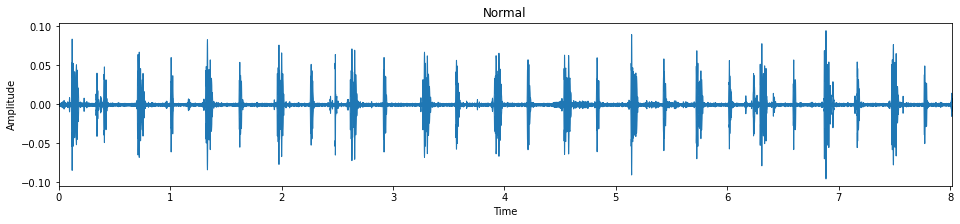

In [ ]:
sound_sample, sample_rate = sampleCategory(file, "Normal")

In [ ]:
peak = max(y)/4
print('Detect peaks with minimum height and distance filters.')
indexes, _ = scipy.signal.find_peaks(y, height=peak, distance=5000)
print('Peaks are: %s' % (indexes))

Detect peaks with minimum height and distance filters.
Peaks are: [   771   6292  13044  31145  39490  48702  66042  84071  93799 101345
 119992 129546 140971 160704 178790 190136 197366]


In [ ]:
print(indexes*2)

[  1542  12584  26088  62290  78980  97404 132084 168142 187598 202690
 239984 259092 281942 321408 357580 380272 394732]


(array([ 0.01222396,  0.01763651,  0.01487106, ..., -0.00073158,
        -0.00096393, -0.00068613], dtype=float32), 22050)

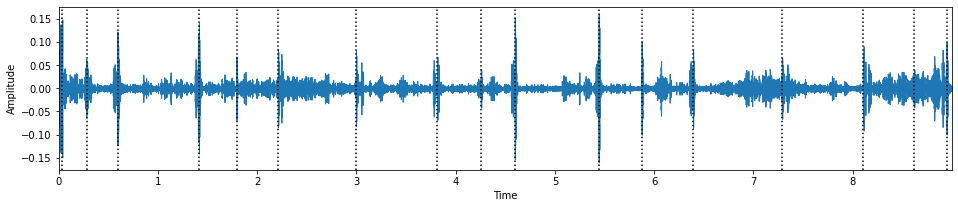

In [ ]:
plotAudio(y, indexes)

In [ ]:
from scipy.signal import butter,filtfilt
def butter_highpass(data,cutoff, fs, order=5):
   """
   Design a highpass filter.
   Args:
   - cutoff (float) : the cutoff frequency of the filter.
   - fs     (float) : the sampling rate.
   - order    (int) : order of the filter, by default defined to 5.
   """
   # calculate the Nyquist frequency
   nyq = 0.5 * fs
   # design filter
   high = cutoff / nyq
   b, a = butter(order, high, btype='high', analog=False)
   # returns the filter coefficients: numerator and denominator
   y = filtfilt(b, a, data)
   return y
x_f=butter_highpass(y,20, sr, order=5)

/usr/local/lib/python3.8/dist-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


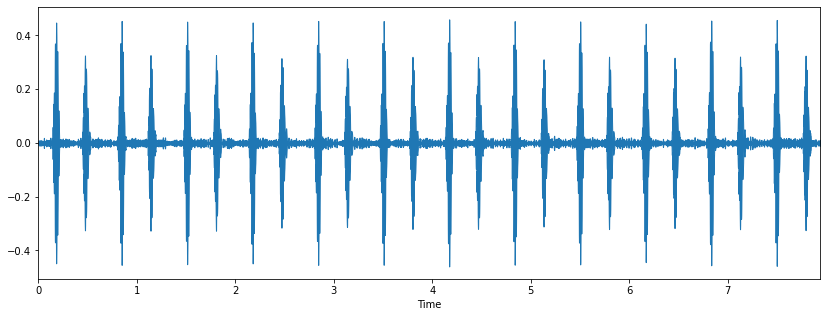

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_f, sr=sr)
plt.show()

In [ ]:
y= x_f

In [ ]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

In [ ]:
len(y)

174979

In [ ]:
onset_frames

array([  4,   7,  20,  28,  36,  49,  65,  78,  85,  94, 100, 106, 117,
       122, 135, 145, 151, 158, 164, 171, 179, 186, 192, 200, 203, 208,
       215, 221, 227, 237, 242, 250, 256, 265, 278, 284, 294, 307, 317,
       323, 336])

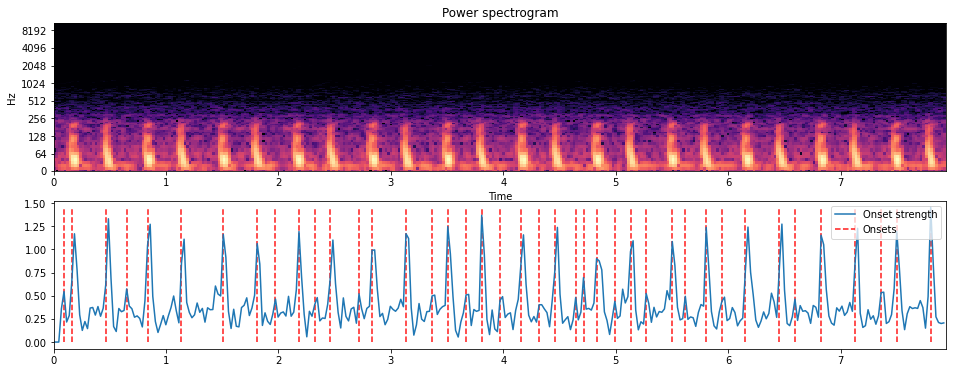

In [ ]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

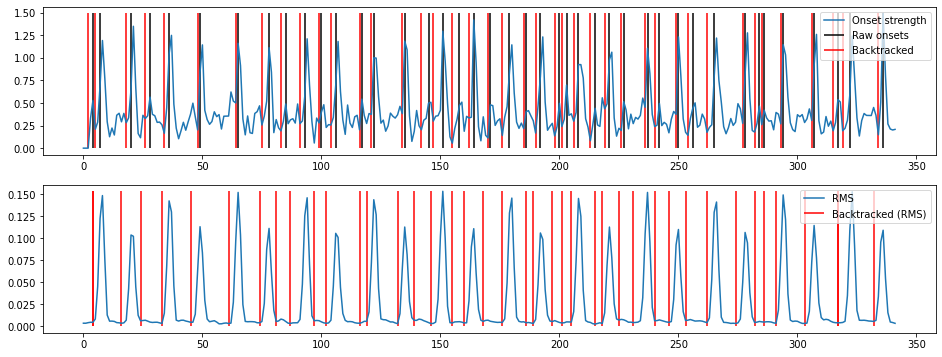

In [ ]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

## Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=12, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

### Encoding

In [ ]:
# Encodeing the five types: 'artifact','murmur','normal'
# ('extrastole','extrahls') are murmurs

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
A_folder=INPUT+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106010602.wav
fixing audio length : artifact__201106010602.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106030612.wav
fixing audio length : artifact__201106030612.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105040918.wav
fixing audio length : artifact__201105040918.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105060108.wav
fixing audio length : artifact__201105060108.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106040722.wav
fixing audio length : artifact__201106040722.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105041959.wav
fixing audio length : artifact__201105041959.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_

In [ ]:
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal_noisynormal_108_1305654420093_B.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__194_1308139824187_A1.wav
fixing audio length : normal__194_1308139824187_A1.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__209_1308162216750_A1.wav
fixing audio length : normal__209_1308162216750_A1.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__126_1306777102824_C.wav
fixing audio length : normal__126_1306777102824_C.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__153_1306848820671_B.wav
fixing audio length : normal__153_1306848820671_B.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__216_1308245839516_C.wav
fixing audio length : normal__216_1308245839516_C.wav
load file  /content/drive/MyDrive/Pattern Recognition/H

### Conctaneation

In [ ]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


### Splitting

In [ ]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

# One-Shot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)

print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)

print ("")
print ("trainAggregationMethoding data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

trainAggregationMethoding data shape:  (409, 40, 1)
training label shape:  (409, 3)

validation data shape:  (88, 40, 1)
validation label shape:  (88, 3)

test data shape:  (88, 40, 1)
test label shape:  (88, 3)
